In [46]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils


In [47]:
def convolve_im_spatial(im: np.array, kernel: np.array, verbose=True):
    """Convolves the image (im) with a spatial kernel using the convolution theorem.
       The kernel is initially in the spatial domain, so it must be padded and
       transformed to the frequency domain before convolution.

    Args:
        im: np.array of shape [H, W]
        kernel: np.array of shape [kH, kW] (spatial domain)
        verbose: bool
    Returns:
        conv_result: np.array of shape [H, W]
    """
    # Step 1: Obtain image dimensions and calculate padding for the kernel
    M, N = im.shape  # Original dimensions of the image
    
    kH, kW = kernel.shape  # Dimensions of the kernel
    
    # Step 2: Zero-pad the kernel to match the size of the image (M x N)
    padded_image = np.zeros((M, N))
    padded_image[:M, :N] = im

    kernel_padded = np.zeros((M, N))
    kernel_padded[:kH, :kW] = kernel

    # Step 3: Multiply by (-1)^(x+y) to center the transform (for both image and kernel)
    for x in range(N):
        for y in range(M):
            padded_image[x, y] *= (-1) ** (x + y)

    kernel_padded = kernel_padded * np.fromfunction(lambda x, y: (-1) ** (x + y), (M, N))

    # Step 4: Compute the FFT of the centered padded image and padded kernel
    fft_image = np.fft.fft2(padded_image)
    fft_kernel = np.fft.fft2(kernel_padded)
    
    # Step 5: Perform element-wise multiplication of the FFT image and the FFT kernel
    filtered_fft_image = fft_image * fft_kernel

    # Step 6: Compute the inverse FFT and multiply by (-1)^(x+y) again to un-center
    inverse_fft_image = np.fft.ifft2(filtered_fft_image)
    processed_image = np.real(inverse_fft_image)
    processed_image *= np.fromfunction(lambda x, y: (-1) ** (x + y), (M, N))

    # Step 7: The result is already of size M x N, so we don't need cropping here
    conv_result = processed_image

    if verbose:
        # Visualization of results
        plt.figure(figsize=(20, 4))
        
        # Original Image
        plt.subplot(1, 5, 1)
        plt.imshow(im, cmap="gray")
        plt.title("Original Image")

        # FFT Image
        plt.subplot(1, 5, 2)
        plt.imshow(np.log(np.abs(fft_image) + 1), cmap="gray")
        plt.title("FFT Image")
        
        # FFT Kernel
        plt.subplot(1, 5, 3)
        plt.imshow(np.log(np.abs(fft_kernel) + 1), cmap="gray")
        plt.title("FFT Kernel (Padded and Centered)")

        # Filtered FFT Image
        plt.subplot(1, 5, 4)
        plt.imshow(np.log(np.abs(filtered_fft_image) + 1), cmap="gray")
        plt.title("Filtered FFT Image")

        # Filtered Spatial Image
        plt.subplot(1, 5, 5)
        plt.imshow(conv_result, cmap="gray")
        plt.title("Filtered Spatial Image")
        
    return conv_result


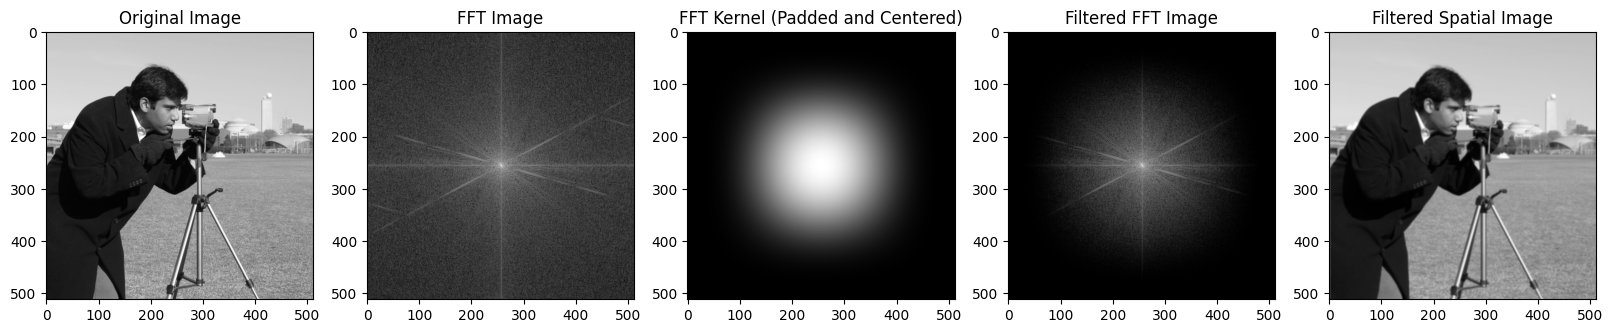

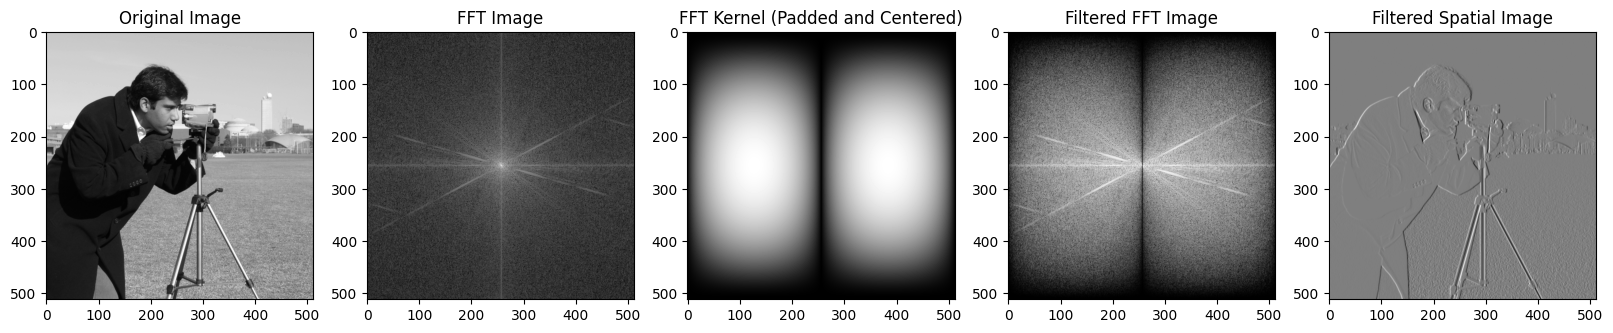

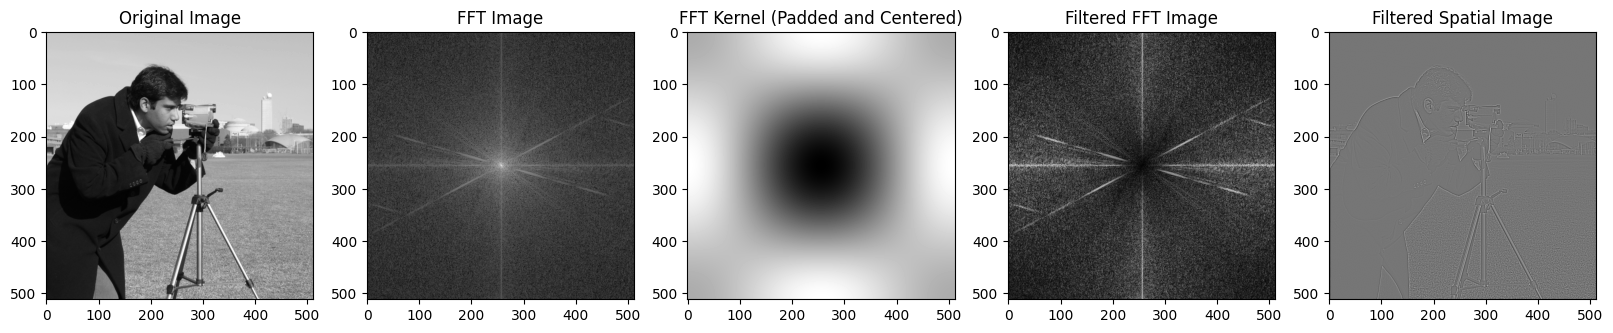

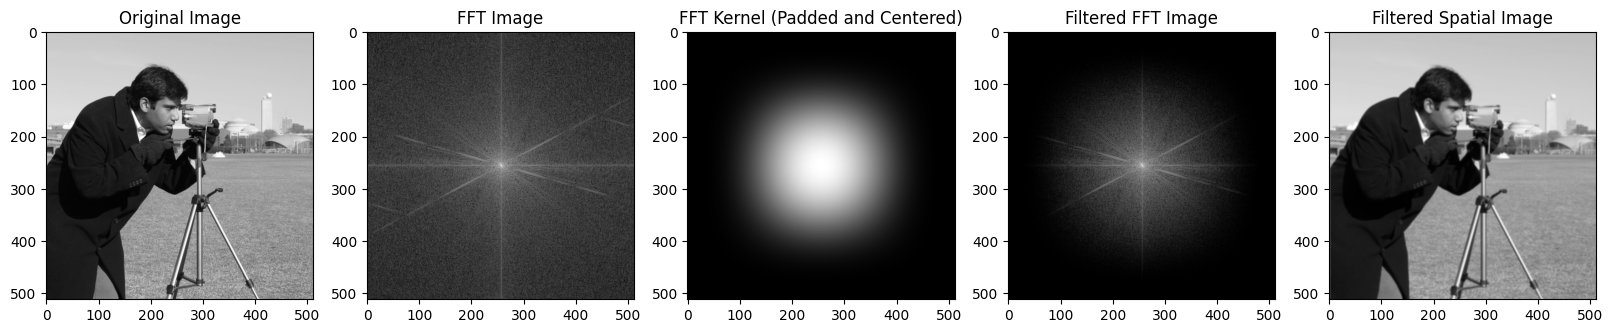

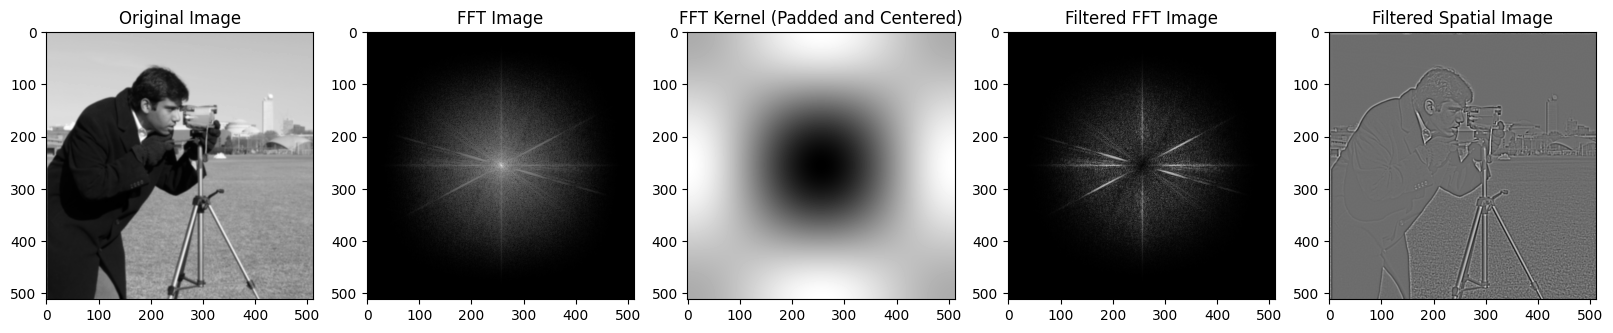

Saving image to: image_processed\camera_gaussian.png
Saving image to: image_processed\camera_sobelx.png
Saving image to: image_processed\camera_laplacian.png
Saving image to: image_processed\camera_LoG.png


In [48]:
if __name__ == "__main__":
    verbose = True  # change if you want

    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)

    # DO NOT CHANGE
    gaussian_kernel = np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1],
    ]) / 256
    image_gaussian = convolve_im_spatial(im, gaussian_kernel, verbose)

    # DO NOT CHANGE
    sobel_horizontal = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    image_sobelx = convolve_im_spatial(im, sobel_horizontal, verbose)

    # Laplacian
    laplacian_kernel = 1 / 256 * np.array([
        [0, 0, 0, 0, 0],
        [0, -1, -1, -1, 0],
        [0, -1, 8, -1, 0],
        [0, -1, -1, -1, 0],
        [0, 0, 0, 0, 0]
    ])
    image_laplacian = convolve_im_spatial(im, laplacian_kernel, verbose)

    # Laplacian of Gaussian (LoG)
    image_gaussian = convolve_im_spatial(im, gaussian_kernel, verbose)
    image_LoG = convolve_im_spatial(image_gaussian, laplacian_kernel, verbose)

    if verbose:
        plt.show()

    utils.save_im("camera_gaussian.png", image_gaussian)
    utils.save_im("camera_sobelx.png", image_sobelx)
    utils.save_im("camera_laplacian.png", image_laplacian)
    utils.save_im("camera_LoG.png", image_LoG)